In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
!pip install openpyxl

In [3]:
gift_df = pd.read_excel("F:/python_env/advancement_donations_and_giving_demo.xlsx",sheet_name='GiftRecords')
grad_df = pd.read_excel("F:/python_env/advancement_donations_and_giving_demo.xlsx",sheet_name='GraduationYear')

In [4]:
gift_df


,Allocation Subcategory,City,College,Gift Allocation,Gift Amount,Gift Date,Major,Prospect ID,State
0,College of Natural Science,Denver,College of Natural Science,Scholarship,5088.0,2010-07-28,Biological Science Interdepartmental,1000,CO
1,College of Natural Science,San Francisco,College of Social Science,Scholarship,3793.0,2010-09-10,Human Development and Family Studies,1001,CA
2,Minority Scholarship Fund,Los Angeles,College of Business,Scholarship,2952.0,2010-06-30,Accounting,1002,CA
3,College of Communication Arts and Sciences,Mesa,College of Natural Science,Scholarship,2872.0,2010-11-23,Mathematics,1003,AZ
4,Diversity Fund,West Valley City,College of Social Science,Endowment,2022.0,2010-10-10,Psychology,1004,UT
...,...,...,...,...,...,...,...,...,...
3908,College of Arts and Sciences,Lexington,College of Engineering,Scholarship,936.0,2015-11-22,Environmental Engineering,3315,KY
3909,Diversity Fund,New York,College of Natural Science,Endowment,4466.0,2015-01-14,Earth Science Interdepartmental,3316,NY
3910,College of Arts and Sciences,San Francisco,College of Arts and Sciences,Scholarship,14156.0,2015-08-30,Art History and Visual Culture,3317,CA
3911,College of Arts and Sciences,Denver,College of Engineering,Scholarship,15711.0,2015-07-03,Computer Science,3318,CO


In [5]:
grad_df

,Prospect ID,Year of Graduation
0,1515,1970
1,1588,1992
2,2508,1984
3,2589,1981
4,3012,1993
...,...,...
2312,2475,1981
2313,1847,1993
2314,2388,1988
2315,3145,1992


In [6]:
df = pd.merge(gift_df, grad_df, on='Prospect ID',how='left')

In [9]:
df

,Allocation Subcategory,City,College,Gift Allocation,Gift Amount,Gift Date,Major,Prospect ID,State,Year of Graduation
0,College of Natural Science,Denver,College of Natural Science,Scholarship,5088.0,2010-07-28,Biological Science Interdepartmental,1000,CO,1993
1,College of Natural Science,San Francisco,College of Social Science,Scholarship,3793.0,2010-09-10,Human Development and Family Studies,1001,CA,1991
2,Minority Scholarship Fund,Los Angeles,College of Business,Scholarship,2952.0,2010-06-30,Accounting,1002,CA,1989
3,College of Communication Arts and Sciences,Mesa,College of Natural Science,Scholarship,2872.0,2010-11-23,Mathematics,1003,AZ,1983
4,Diversity Fund,West Valley City,College of Social Science,Endowment,2022.0,2010-10-10,Psychology,1004,UT,1986
...,...,...,...,...,...,...,...,...,...,...
3908,College of Arts and Sciences,Lexington,College of Engineering,Scholarship,936.0,2015-11-22,Environmental Engineering,3315,KY,1992
3909,Diversity Fund,New York,College of Natural Science,Endowment,4466.0,2015-01-14,Earth Science Interdepartmental,3316,NY,1976
3910,College of Arts and Sciences,San Francisco,College of Arts and Sciences,Scholarship,14156.0,2015-08-30,Art History and Visual Culture,3317,CA,1985
3911,College of Arts and Sciences,Denver,College of Engineering,Scholarship,15711.0,2015-07-03,Computer Science,3318,CO,2008


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Allocation Subcategory  3913 non-null   object        
 1   City                    3913 non-null   object        
 2   College                 3913 non-null   object        
 3   Gift Allocation         3913 non-null   object        
 4   Gift Amount             3913 non-null   float64       
 5   Gift Date               3913 non-null   datetime64[ns]
 6   Major                   3913 non-null   object        
 7   Prospect ID             3913 non-null   int64         
 8   State                   3913 non-null   object        
 9   Year of Graduation      3913 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 305.8+ KB


In [17]:
df.isnull().sum()

Allocation Subcategory    0
City                      0
College                   0
Gift Allocation           0
Gift Amount               0
Gift Date                 0
Major                     0
Prospect ID               0
State                     0
Year of Graduation        0
dtype: int64

In [19]:
df['Gift Date'] = pd.to_datetime(df['Gift Date'])

In [20]:
df['Gift Date']

0      2010-07-28
1      2010-09-10
2      2010-06-30
3      2010-11-23
4      2010-10-10
          ...    
3908   2015-11-22
3909   2015-01-14
3910   2015-08-30
3911   2015-07-03
3912   2015-11-20
Name: Gift Date, Length: 3913, dtype: datetime64[ns]

In [12]:
Gift_Year = df['Gift Date'].dt.year
Gift_Month = df['Gift Date'].dt.month

In [14]:
Gift_Year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3913 entries, 0 to 3912
Series name: Gift Date
Non-Null Count  Dtype
--------------  -----
3913 non-null   int32
dtypes: int32(1)
memory usage: 15.4 KB


In [15]:
Gift_Month

0        7
1        9
2        6
3       11
4       10
        ..
3908    11
3909     1
3910     8
3911     7
3912    11
Name: Gift Date, Length: 3913, dtype: int32

In [16]:
Gift_Month.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3913 entries, 0 to 3912
Series name: Gift Date
Non-Null Count  Dtype
--------------  -----
3913 non-null   int32
dtypes: int32(1)
memory usage: 15.4 KB


In [22]:
df['Major'] = df['Major'].fillna("Unknown")

# summary of gift amount

In [23]:
df['Gift Amount'].describe()

count      3913.000000
mean       6305.330181
std        9234.829982
min           8.000000
25%        2775.000000
50%        5718.000000
75%        8519.000000
max      455821.000000
Name: Gift Amount, dtype: float64

In [24]:
unique_donors = df['Prospect ID'].nunique()

In [25]:
unique_donors

2317

In [26]:
df.groupby('College')['Gift Amount'].sum().sort_values(ascending=False)

College
College of Natural Science                      5136971.5
College of Arts and Sciences                    4720312.5
College of Social Science                       3694436.5
College of Agriculture and Natural Resources    3433165.0
College of Engineering                          1997955.0
College of Business                             1400505.0
College of Music                                1066590.5
College of Political Science                     934760.5
College of Education                             850369.5
College of Nursing                               617842.0
College of Communication Arts and Sciences       577251.0
College of Veterinary Medicine                   242598.0
Name: Gift Amount, dtype: float64

In [27]:
df.groupby('State')['Gift Amount'].mean().sort_values(ascending=False)

State
WY    9307.400000
IL    9130.402597
CO    8651.942935
NJ    8127.000000
UT    7044.535714
MO    6965.781513
NM    6771.320000
IN    6745.095890
LA    6611.617021
OH    6539.555556
MI    6449.765152
KS    6419.269663
NV    6306.315789
MA    6213.537313
KY    6173.580645
OR    6130.280000
TX    6121.431310
TN    6083.128440
CA    5928.708423
OK    5882.260000
WA    5871.247619
FL    5859.368159
NY    5780.350785
NH    5764.692308
NC    5731.318584
CT    5639.965517
AL    5504.593750
PA    5503.763636
IA    5480.387097
GA    5463.459459
VA    5340.134454
MT    5300.500000
RI    5293.333333
AZ    5242.287879
AR    5199.200000
SC    5100.074074
MN    5053.400000
NE    4917.589286
WI    4758.342857
DC    4420.685185
Name: Gift Amount, dtype: float64

# Outliers detection

In [32]:
q1 = df['Gift Amount'].quantile(0.25)
q2 = df['Gift Amount'].quantile(0.75)

IQR = q2 - q1

lb = q1-1.5*IQR
ub = q2+1.5*IQR

outliers = df[(df['Gift Amount']<lb) | (df['Gift Amount']>ub)]

print(outliers)

                            Allocation Subcategory      City  \
12                    College of Arts and Sciences   Detroit   
13                                  Campus Museums   Detroit   
148                              Campus Recreation    Austin   
149   College of Agriculture and Natural Resources    Austin   
150                                  Trustees Fund    Austin   
...                                            ...       ...   
3546                College of Veterinary Medicine  New York   
3622                                 Trustees Fund    Denver   
3747                            Alumni Association    Denver   
3809    College of Communication Arts and Sciences    Denver   
3899                        University Annual Fund    Denver   

                           College  Gift Allocation  Gift Amount  Gift Date  \
12    College of Political Science      Scholarship      26590.0 2012-06-19   
13    College of Political Science  Campus Resource      28838.0 2014-03-

Text(0.5, 1.0, 'Donation Amount Outliers by College')

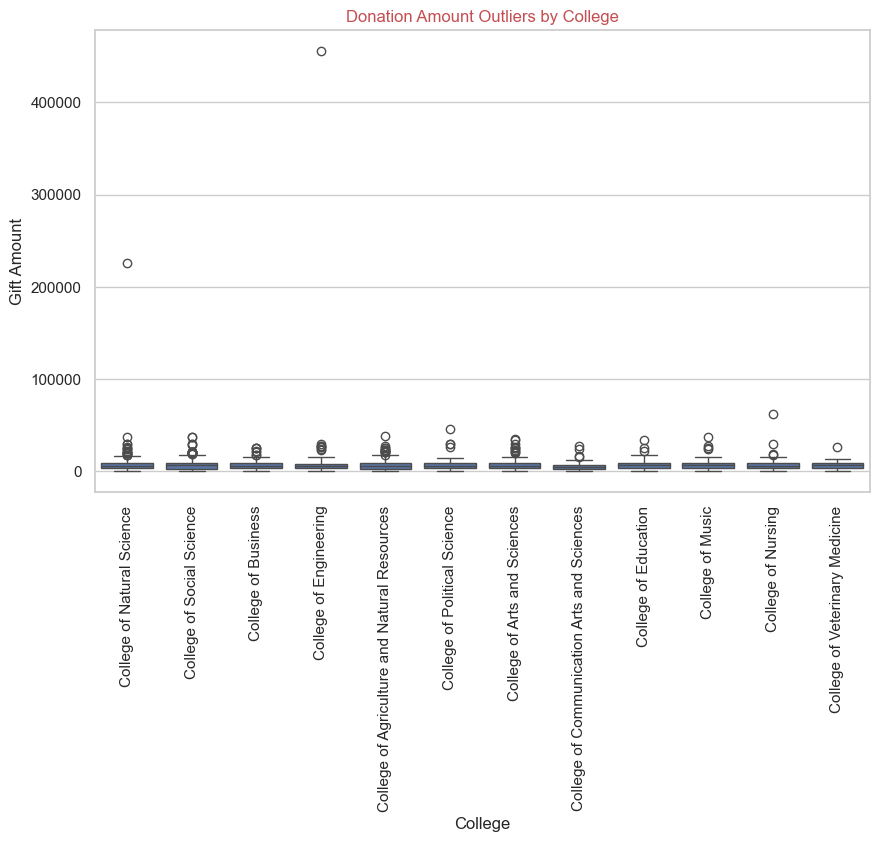

In [38]:
sns.boxplot(x='College',y='Gift Amount',data= df)
plt.xticks(rotation=90)
plt.title('Donation Amount Outliers by College',color='r')

# Data Visualization an EDA

Text(0.5, 1.0, 'Year-wise Total Donations')

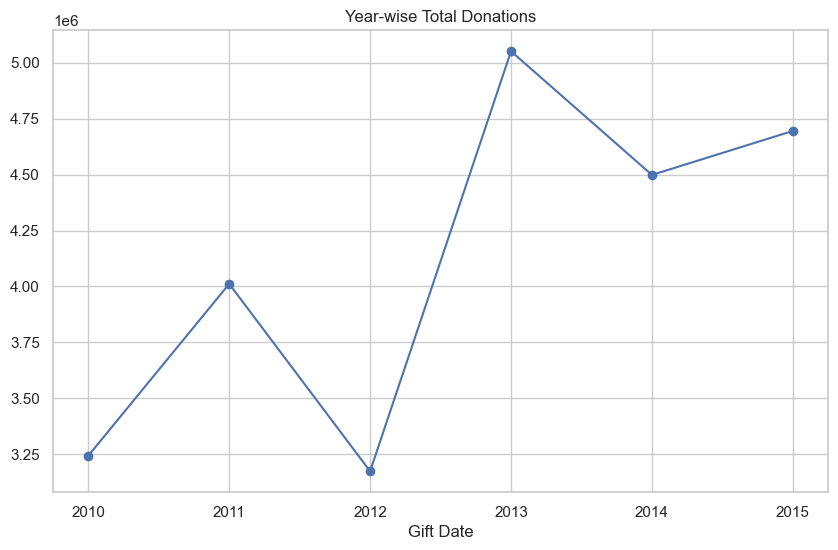

In [42]:
df.groupby(Gift_Year)['Gift Amount'].sum().plot(marker='o')
plt.title("Year-wise Total Donations")


<Axes: title={'center': 'Top Donating Colleges'}, xlabel='College'>

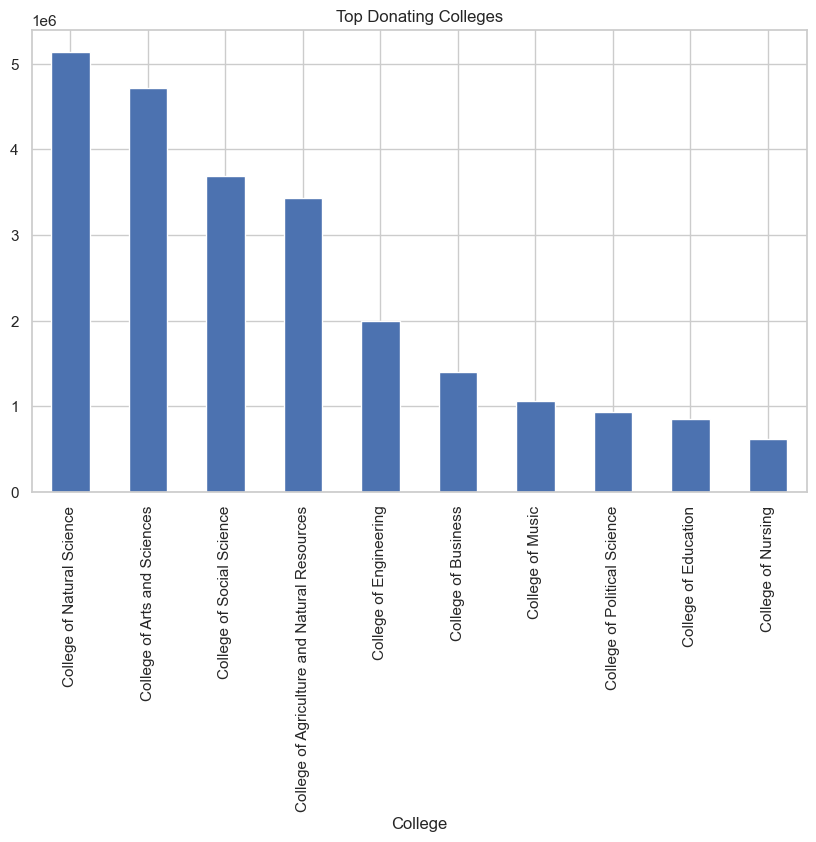

In [43]:
top_colleges = df.groupby('College')['Gift Amount'].sum().nlargest(10)
top_colleges.plot(kind='bar', title='Top Donating Colleges')

Text(0.5, 1.0, 'Donation Amount Distribution')

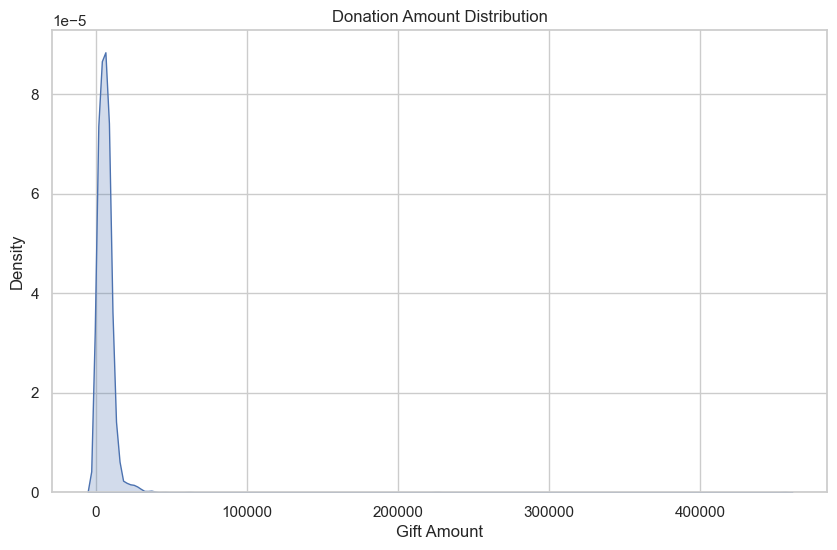

In [45]:
sns.kdeplot(df['Gift Amount'], fill=True)
plt.title("Donation Amount Distribution")

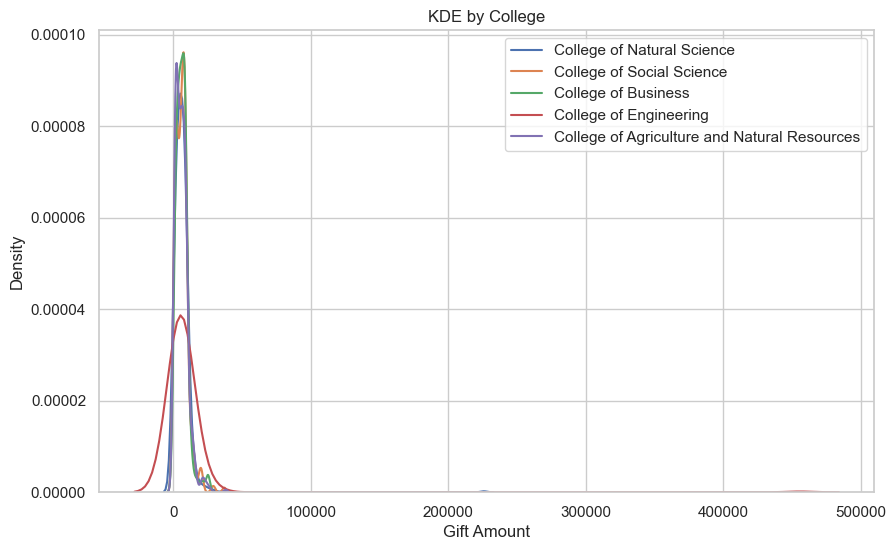

In [46]:
for college in df['College'].unique()[:5]:
    sns.kdeplot(df[df['College'] == college]['Gift Amount'], label=college)
plt.title("KDE by College")
plt.legend()

# Advance Insights

Text(0.5, 1.0, 'Donation Trends by Graduation Decade')

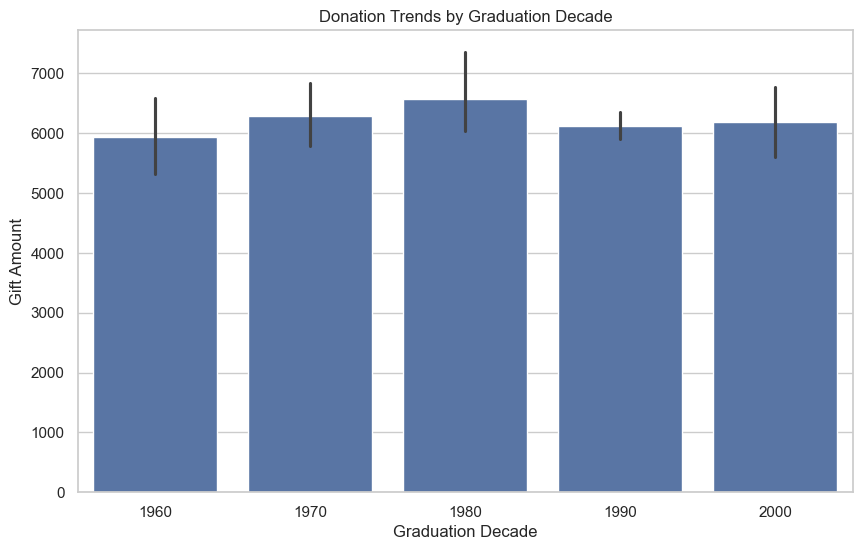

In [48]:
# Donations by Graduation Decade
df['Graduation Decade'] = (df['Year of Graduation'] // 10) * 10
sns.barplot(x='Graduation Decade', y='Gift Amount', data=df)
plt.title('Donation Trends by Graduation Decade')

Text(0.5, 1.0, 'Correlation Heatmap')

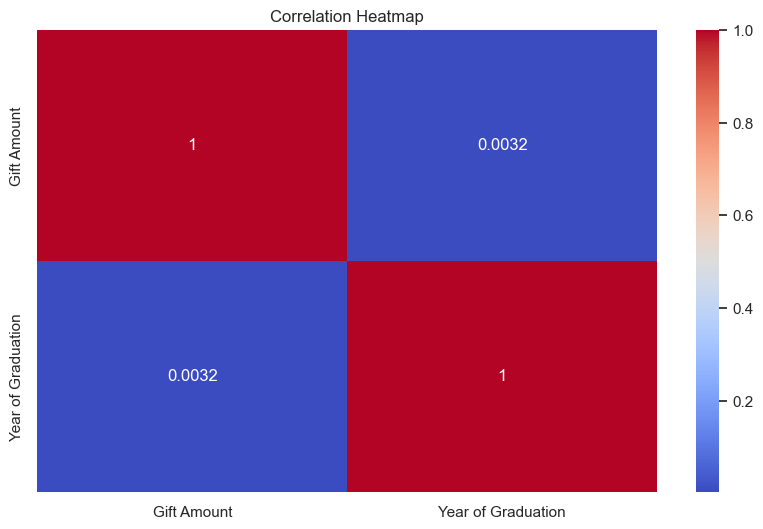

In [52]:
# Correlation heatmap
numeric_df = df[['Gift Amount', 'Year of Graduation']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')